<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 57 to 1271
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_start_dt     1215 non-null   object 
 1   week_end_dt       1215 non-null   object 
 2   vietnam_season    1215 non-null   int64  
 3   p_color           1215 non-null   object 
 4   price             1215 non-null   float64
 5   total_volume      1215 non-null   float64
 6   brazil            1215 non-null   float64
 7   india             1215 non-null   float64
 8   vietnam           1215 non-null   float64
 9   indonesia         1215 non-null   float64
 10  china             1215 non-null   float64
 11  brazil_season     1215 non-null   bool   
 12  indonesia_season  1215 non-null   bool   
 13  india_season      1215 non-null   bool   
 14  china_season      1215 non-null   bool   
 15  jordan_max_price  1215 non-null   float64
 16  jordan_min_price  1215 non-null   float64

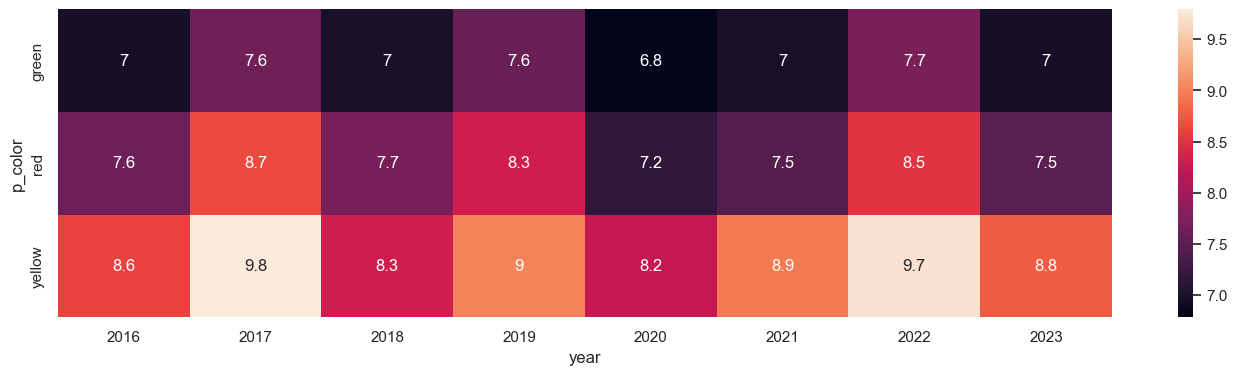

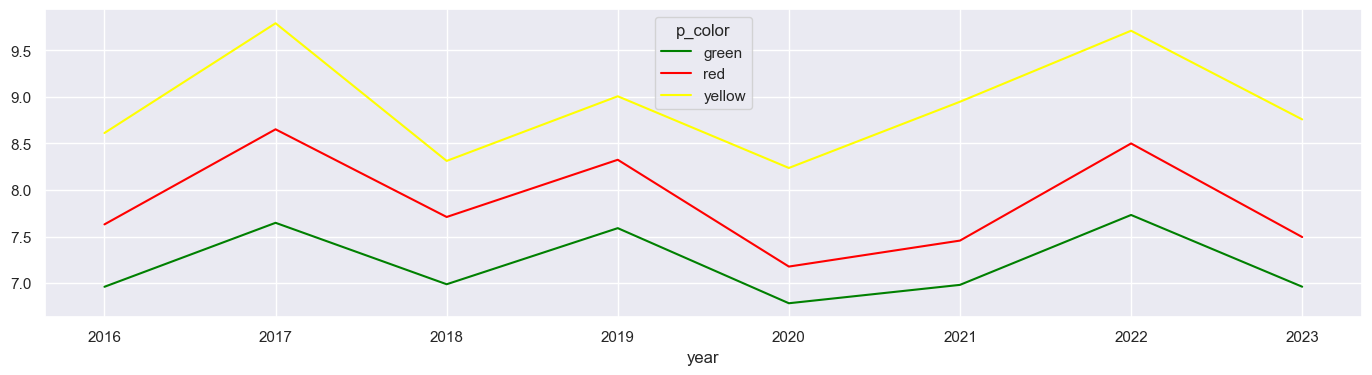

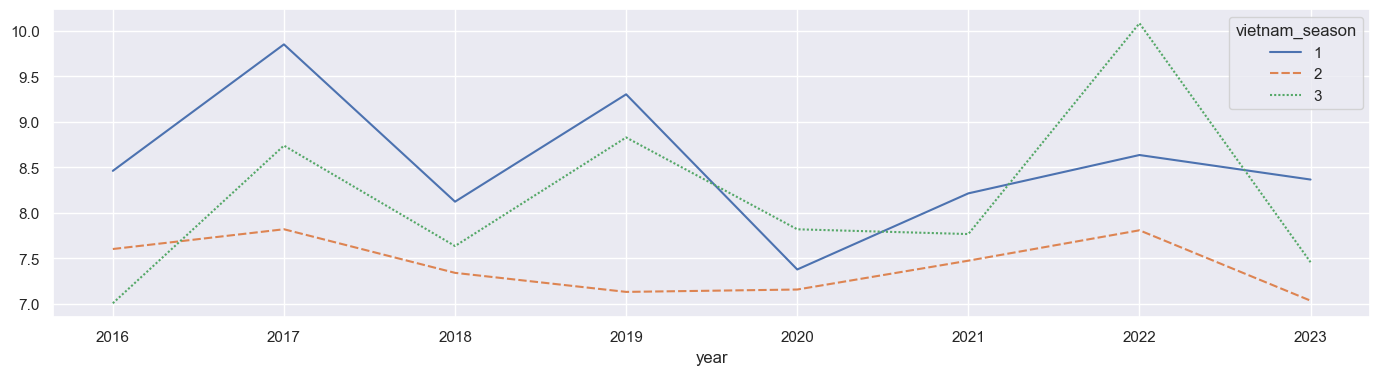

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.501     1.000-27201.805 27200.804
 (0 - 2)      0.082     1.000-27201.222 27201.387
 (0 - 3)   -221.504     1.000-27422.808 26979.800
 (0 - 4)    -86.517     1.000-27287.821 27114.787
 (0 - 5)  -8479.636     0.993-35680.941 18721.668
 (0 - 6) -245295.023     0.000-272496.327-218093.719
 (0 - 7) -28736.095     0.029-55937.400 -1534.791
 (0 - 8) -154940.070     0.000-182141.374-127738.766
 (0 - 9) -1806521.517     0.000-1833722.821-1779320.212
 (1 - 0)      0.501     1.000-27200.804 27201.805
 (1 - 2)      0.583     1.000-27200.722 27201.887
 (1 - 3)   -221.003     1.000-27422.308 26980.301
 (1 - 4)    -86.016     1.000-27287.321 27115.288
 (1 - 5)  -8479.136     0.993-35680.440 18722.169
 (1 - 6) -245294.522     0.000-272495.827-218093.218
 (1 - 7) -28735.595     0.029-55936.899 -1534.290
 (1 - 8) -154939.569     0.000-182140.874-127738.265
 (1 - 9) -1806

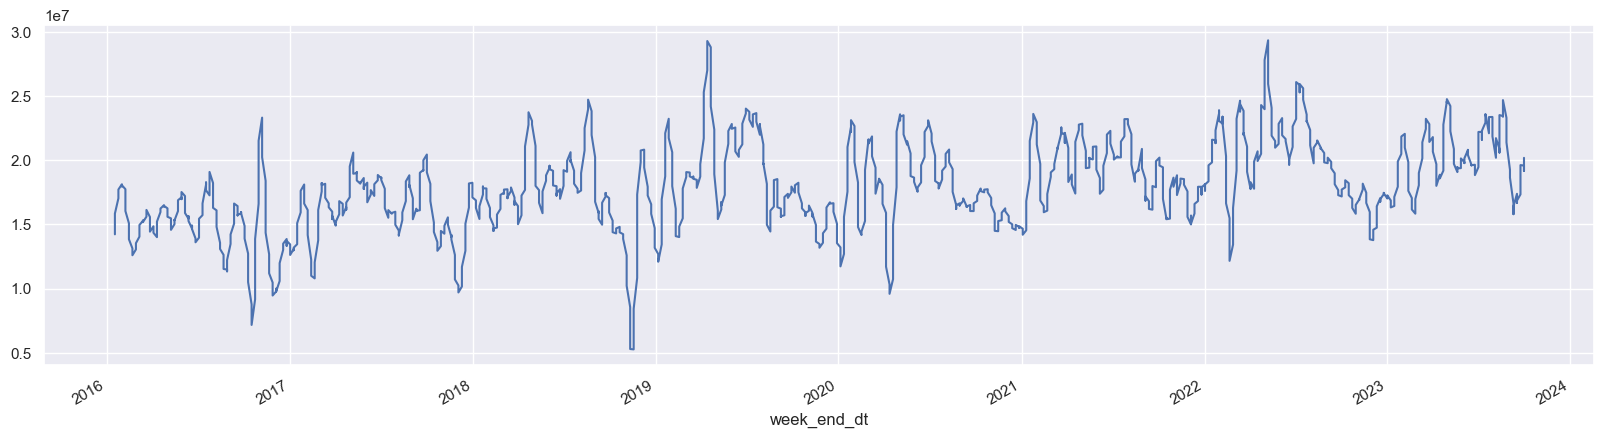

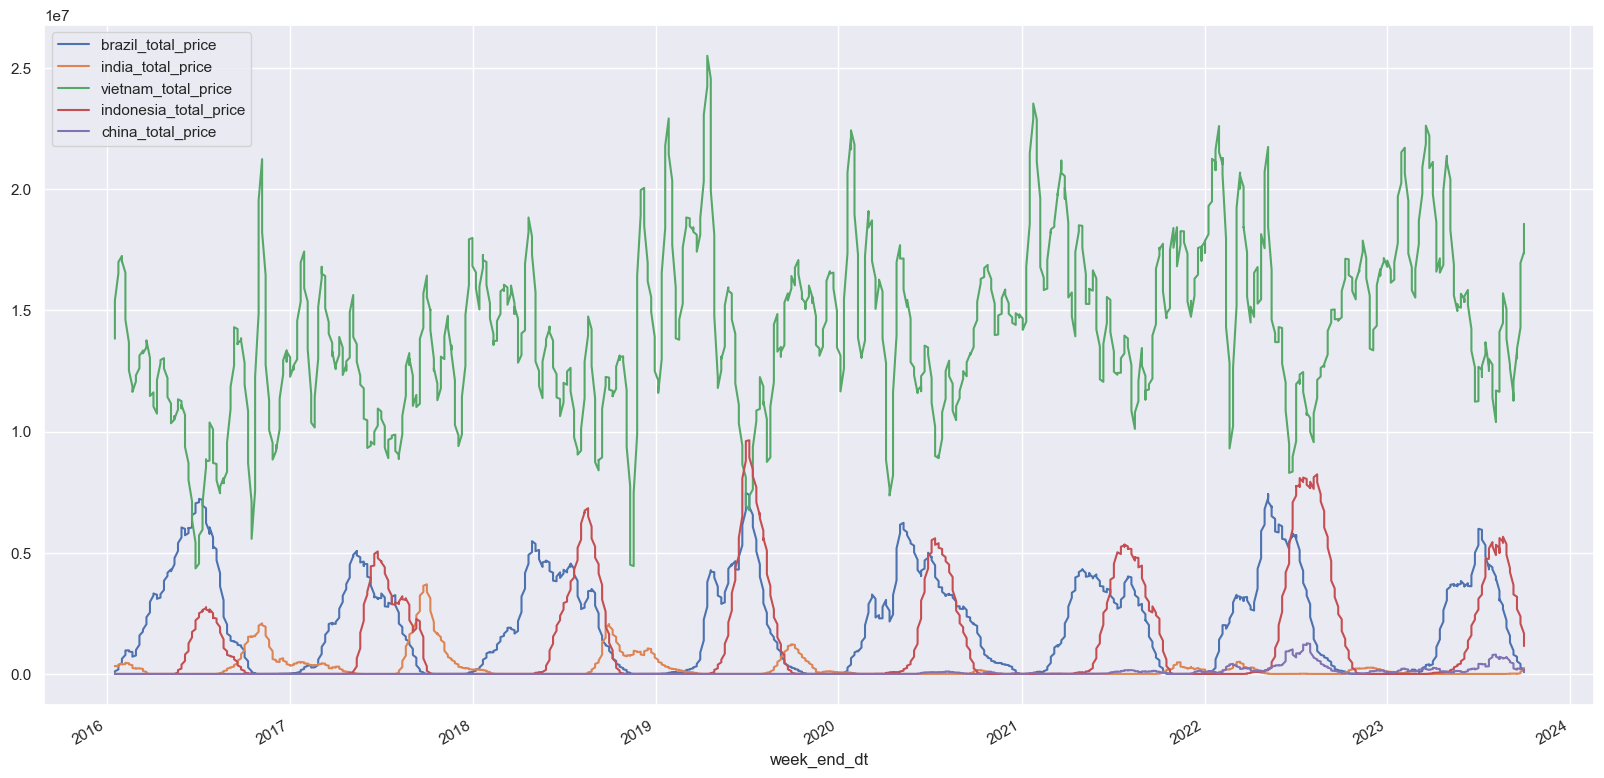

(405, 32) (405, 32) (405, 32)


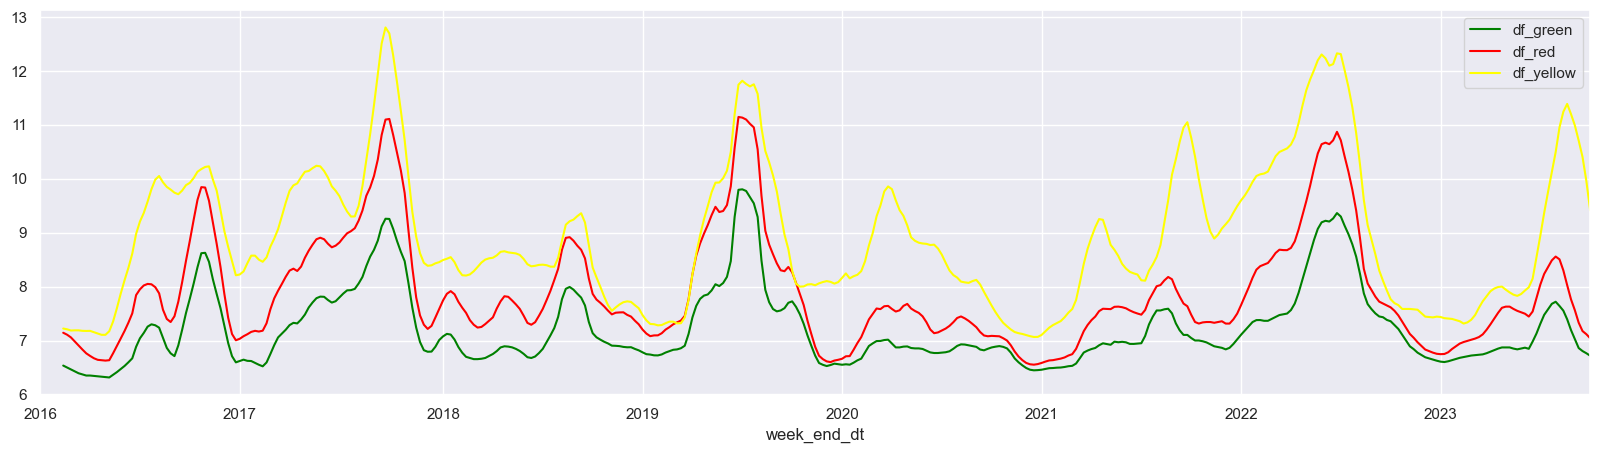

(409, 496) (409, 496) (409, 496)
(402, 478) (402, 478) (402, 478)
(402, 478) (402, 478) (402, 478)


In [68]:
%run C:\Users\Omar\Intern_Final_Project\notebooks\Data_Cleaning\Features_Selection.ipynb

### *cross validation*

*We will keep the last 16 rows of the dataset and do a Rolling Moving Origin of step size of 4*


*lets explain this visually*

In [69]:
from sklearn.model_selection import TimeSeriesSplit

In [70]:
test_data_red=df_red[-16:]
#####
X = test_data_red.drop("price",axis=1)
y = test_data_red["price"]
date=test_data_red.reset_index()["week_end_dt"]
tscv = TimeSeriesSplit(n_splits=3,max_train_size=16,test_size=4,gap=0)
for i, (train_index, test_index) in enumerate(tscv.split(X)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 3]
  Test:  index=[4 5 6 7]
Fold 1:
  Train: index=[0 1 2 3 4 5 6 7]
  Test:  index=[ 8  9 10 11]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11]
  Test:  index=[12 13 14 15]


The above code out come expresess how the cross validation works ,
1st fold : we consider the 4 intial points as train data and the next 4 points as test data
2ns fold : the test points from the prevuoys fold we be appened to the new train points asnd new points ahead are test points
3rd fold : works as metioned above

The below chart is ease the process:


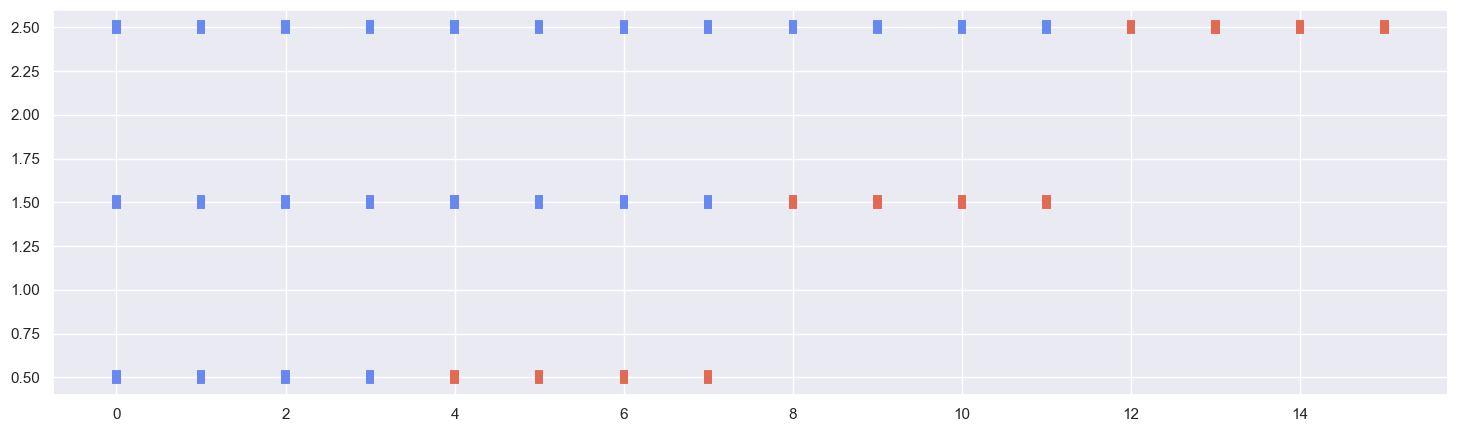

In [71]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, n_splits, X, y):
    fig, ax = plt.subplots(1, 1, figsize = (18, 5))
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
        
plot_cv_indices(cv=tscv,n_splits=3,X=X,y=y)

---
importing needed libraries

In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor
import warnings                                  
warnings.filterwarnings('ignore')

In [73]:
def data_scale():   
     scaler = StandardScaler()
     for col in df_red:
           if col not in ["price"]:
                  df_red[col]=scaler.fit_transform(df_red[[col]])

     for col in df_green:
           if col not in ["price"]:
                  df_green[col]=scaler.fit_transform(df_green[[col]])

     for col in df_yellow:
           if col not in ["price"]:
                  df_yellow[col]=scaler.fit_transform(df_yellow[[col]])             


data_scale()

In [74]:
def train_test(data):
    tscv = TimeSeriesSplit(n_splits=4,max_train_size=16,test_size=4,gap=0)
    mae_scores = []
    y_pred_results=[]

    models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                  "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]
              
    models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
        XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


    test_data=data[-20:]
    time_series_data = test_data.values

    for model in models:
              for train_index, test_index in tscv.split(time_series_data):
                                  X_train, y_train = time_series_data[train_index, 1:], time_series_data[train_index, 0]
                                  X_test, y_test = time_series_data[test_index, 1:], time_series_data[test_index, 0]

                                  model.fit(X_train, y_train)
                                  y_pred = model.predict(X_test)
                                  y_pred_results.append(y_pred)
                                  mae = np.mean(mean_absolute_error(y_test, y_pred))
                                  mae_scores.append(mae)    
                                  outcome=pd.concat([pd.DataFrame(pd.DataFrame(y_pred_results[0:4]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[4:8]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[8:12]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[12:16]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[16:20]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[20:24]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[24:28]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[28:32]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[32:36]).stack().reset_index(drop=True))],axis=1)
                                  new_date_index=pd.date_range(start="2023-07-16",end="2023-10-29",freq="W")
                                  new_date_index=pd.DataFrame({"date":new_date_index})
                                  outcome.columns=models_names
                                  outcome_all=pd.concat([outcome,new_date_index],axis=1).set_index("date")

                                  outcome_mae=pd.concat([pd.DataFrame(pd.DataFrame(mae_scores[0:4]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[4:8]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[8:12]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[12:16]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[16:20]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[20:24]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[24:28]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[28:32]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[32:36]).stack().reset_index(drop=True))],axis=1)
                                  outcome_mae.columns=models_names
                                  
                                  




    return outcome_all,outcome_mae        

In [ ]:

df_red_outcomes=train_test(data=df_red)
df_green_outcomes=train_test(data=df_green)
df_yellow_outcomes=train_test(data=df_yellow)

In [76]:
pd.DataFrame(df_red_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score").T

,6,5,2,4,8,1,0,3,7
index,AdaBoostRegressor_boo,XGBRFRegressor_boo,SVR(),XGBRegressor_boo,CatBoostRegressor_boo,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,LGBMRegressor_boo
score,2.242544,2.263427,2.390601,2.397107,2.432192,2.449592,2.579155,2.64386,2.690026


In [77]:
pd.DataFrame(df_green_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score").T

,6,4,5,0,2,1,8,3,7
index,AdaBoostRegressor_boo,XGBRegressor_boo,XGBRFRegressor_boo,DecisionTreeRegressor,SVR(),RandomForestRegressor,CatBoostRegressor_boo,LinearRegression,LGBMRegressor_boo
score,1.999644,2.023283,2.027003,2.068038,2.072525,2.080522,2.092057,2.182475,2.287597


In [78]:
pd.DataFrame(df_yellow_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score").T

,0,6,3,2,1,5,4,8,7
index,DecisionTreeRegressor,AdaBoostRegressor_boo,LinearRegression,SVR(),RandomForestRegressor,XGBRFRegressor_boo,XGBRegressor_boo,CatBoostRegressor_boo,LGBMRegressor_boo
score,2.940008,2.955728,3.079869,3.09313,3.16896,3.169931,3.181098,3.217818,3.608196


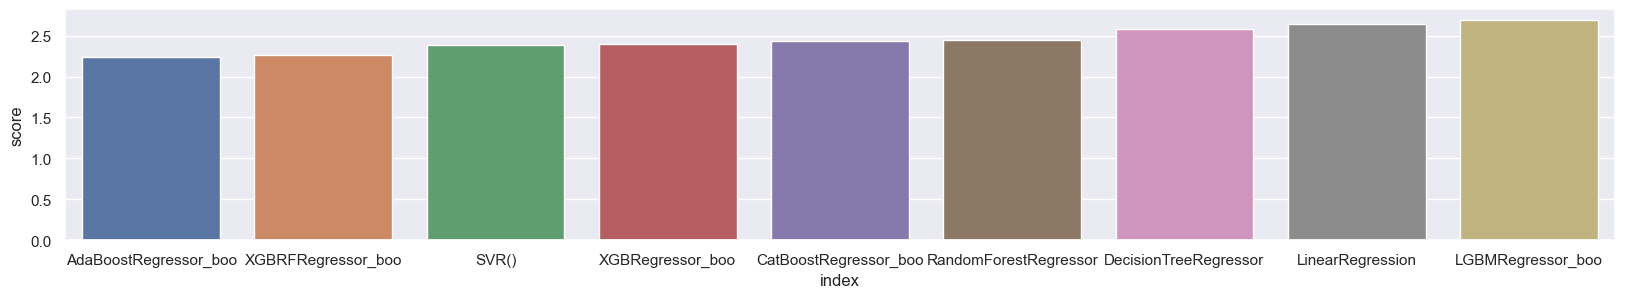

In [79]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(df_red_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

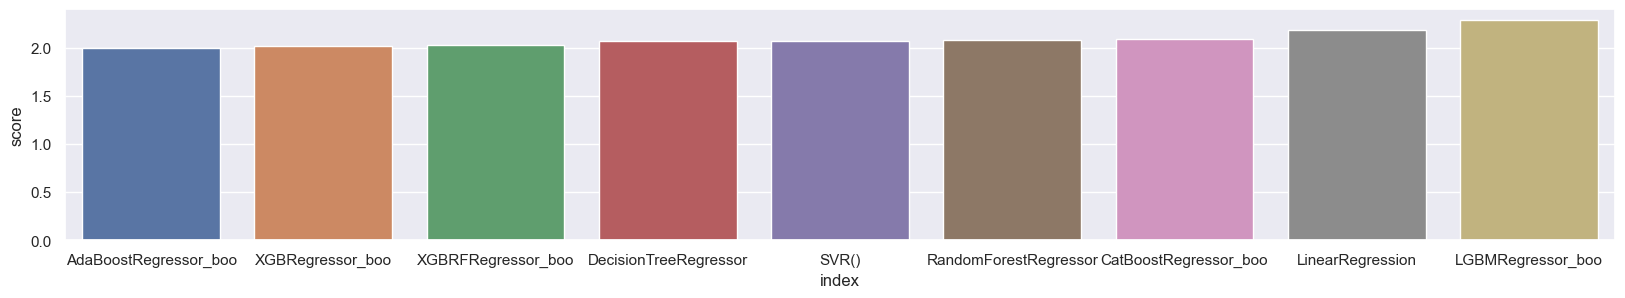

In [80]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(df_green_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

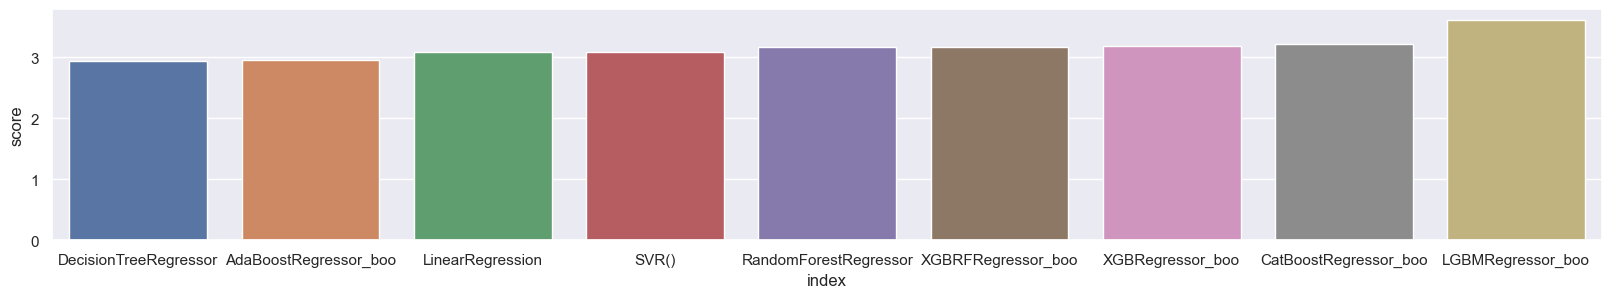

In [81]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(df_yellow_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

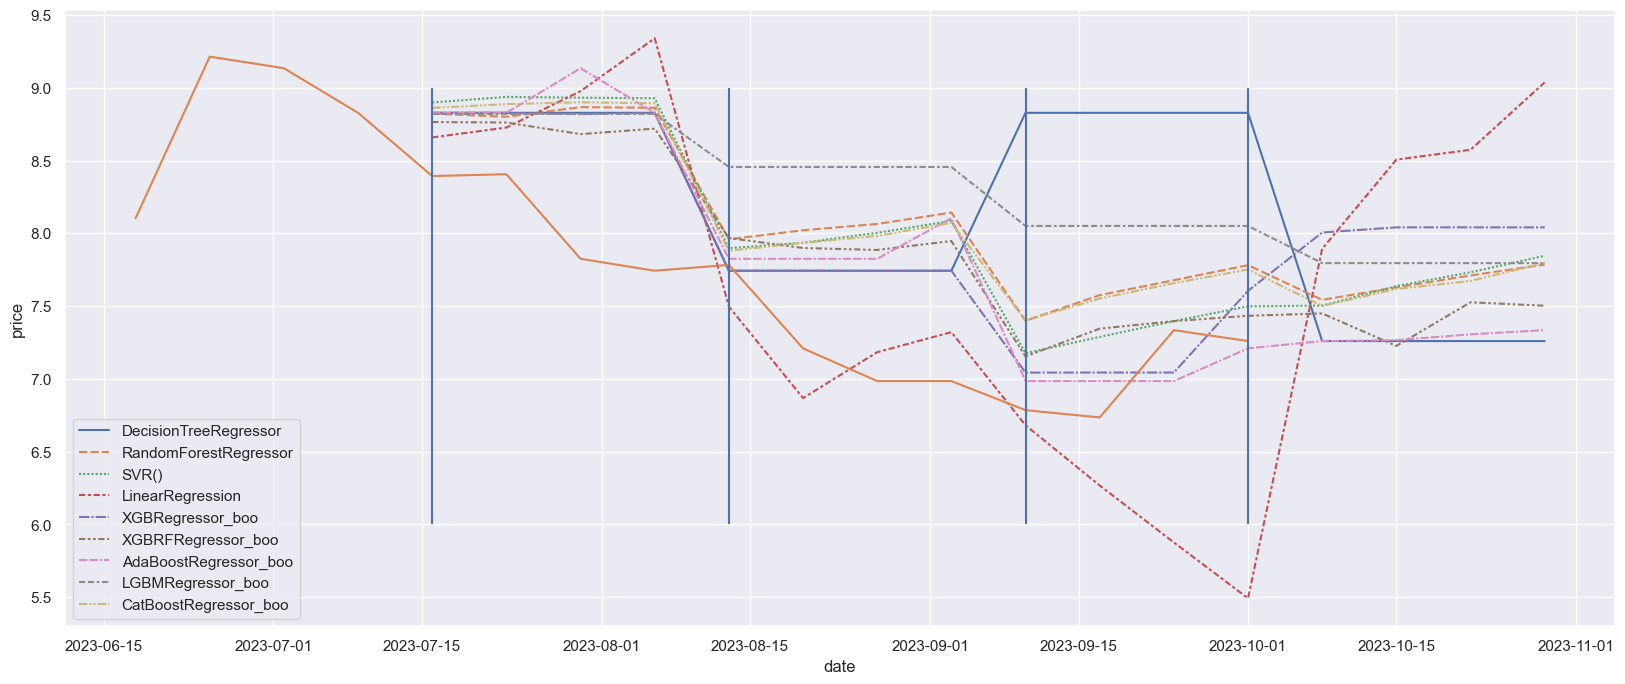

In [94]:
fig, ax = plt.subplots(figsize = (20,8));
y_min = 6
y_max = 9
sns.lineplot(df_red_outcomes[0]);
sns.lineplot(df_red[-20:-4]["price"]);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)

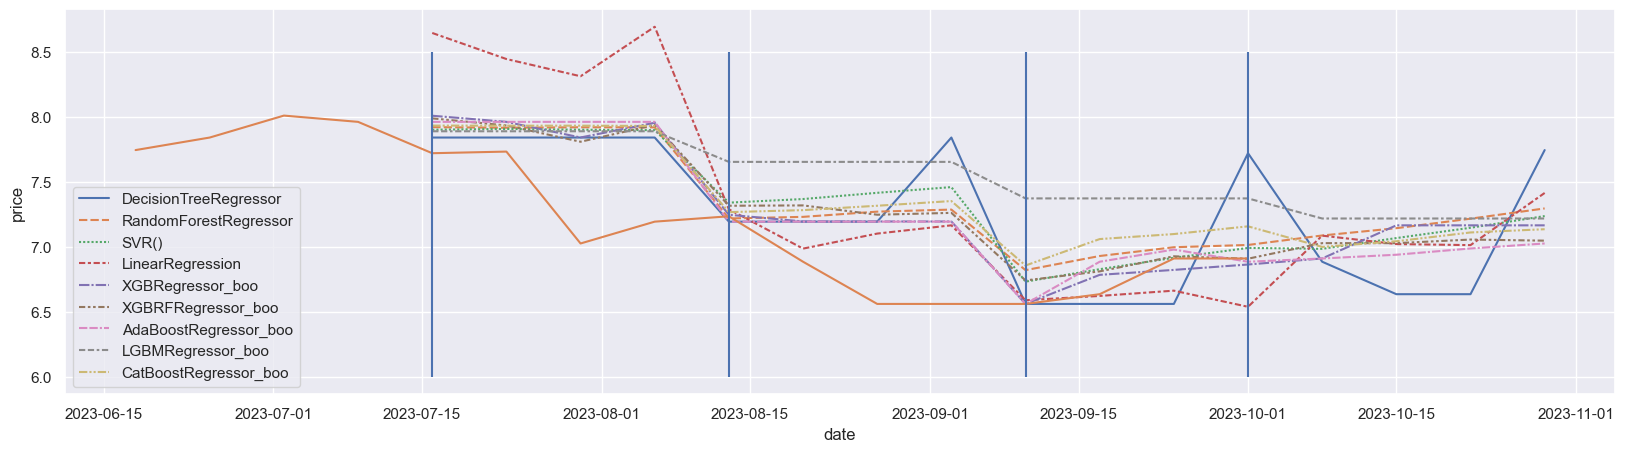

In [92]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 6
y_max = 8.5
sns.lineplot(df_green_outcomes[0]);
sns.lineplot(df_green[-20:-4]["price"]);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)

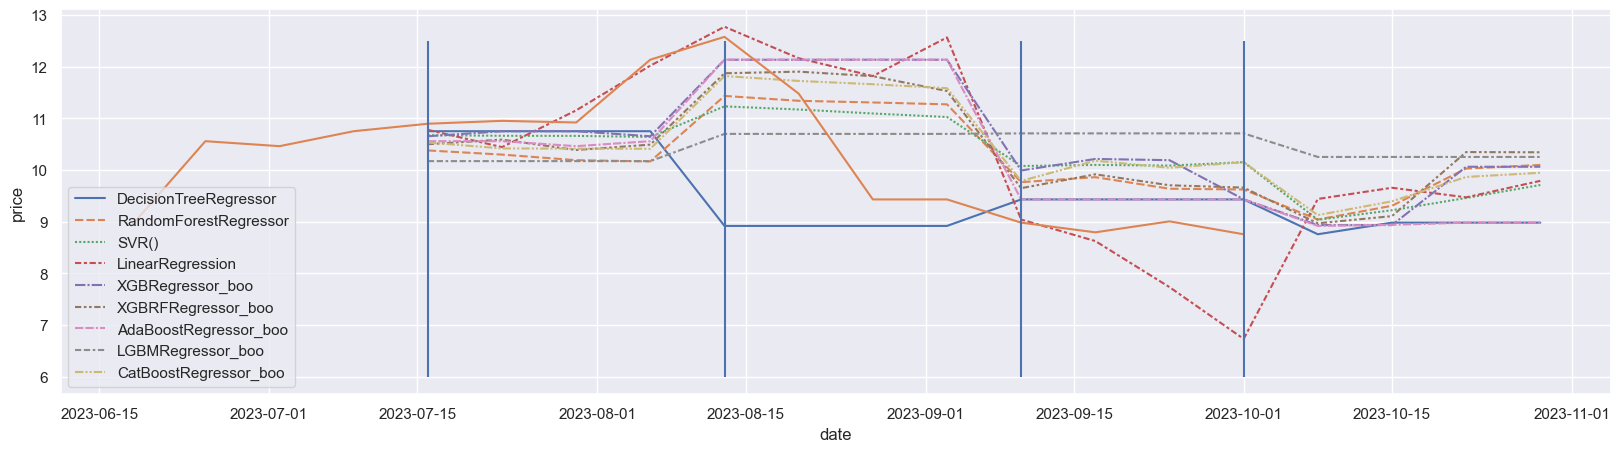

In [93]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 6 
y_max = 12.5
sns.lineplot(df_yellow_outcomes[0]);
sns.lineplot(df_yellow[-20:-4]["price"]);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)

---